# Evaluación y Optimización de una Red Neuronal Artificial (RNA)

## Objetivo
Este ejercicio está dividido en dos partes:
1. Evaluación con validación cruzada K-Fold.
2. Prevención del sobreajuste con Dropout y ajuste de hiperparámetros.


## Parte 1: Evaluación con K-Fold

Usamos el dataset `digits` de sklearn.



In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Cargar datos
digits = load_digits()
X = digits.data
y = to_categorical(digits.target, num_classes=10)

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, val_idx in kf.split(X):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(64,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X[train_idx], y[train_idx], epochs=20, verbose=0)
    loss, acc = model.evaluate(X[val_idx], y[val_idx], verbose=0)
    scores.append(acc)

print("Precisión media en validación:", np.mean(scores))

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión media en validación: 0.9743964672088623


## Parte 2: Dropout y Ajuste de Hiperparámetros



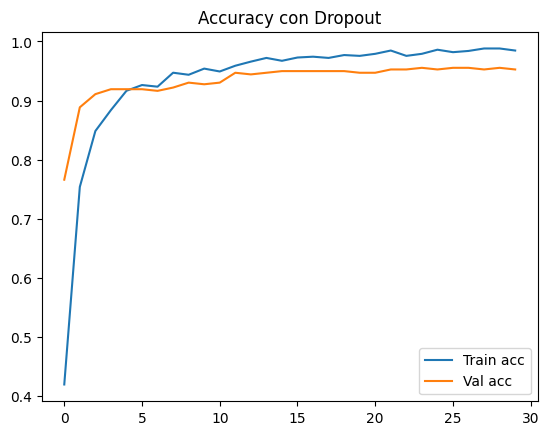

In [5]:
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

# Red con Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(X[train_idx], y[train_idx], epochs=30, batch_size=32, validation_data=(X[val_idx], y[val_idx]), verbose=0)

# Visualización
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title("Accuracy con Dropout")
plt.show()

## Conclusión
- Compara diferentes tamaños de capa oculta y tasas de dropout.
- Prueba funciones de activación como `relu` vs `tanh`.
- Reflexiona sobre cómo los cambios impactan en el sobreajuste y la generalización.
